In [15]:
from utils.constants import TournamentTypes
from utils.Tournament import Tournament
from utils.ranking_system import UniversalRatingSystem
from utils.tournament_helper import load_tournaments_from_history

Enter Tournament Details here

In [16]:
TOURNEY_NUMBER = 8
TOURNAMENT_TYPE = TournamentTypes.CHAMPIONSHIP
SAVE_IMAGES = False
SAVE_CSV = False

### Reading Data

In [17]:
tournament = Tournament(TOURNAMENT_TYPE, TOURNEY_NUMBER)

> 3 of Spades Championship #8
Players participating in this Championship are : ['Prateek', 'Akash', 'Ani', 'Nats', 'Abhi']


# Part 1 - Crunching player stats

In [18]:
tournament.getScoreBoard()

,Player,Wins,TotalGames,AvgPoints,TotalPoints,WinPercentage
3,Nats,33,59,241.9,14270,55.9
1,Akash,32,59,237.6,14020,54.2
2,Ani,30,59,221.2,13050,50.8
4,Prateek,26,59,191.2,11280,44.1
0,Abhi,25,59,184.9,10910,42.4


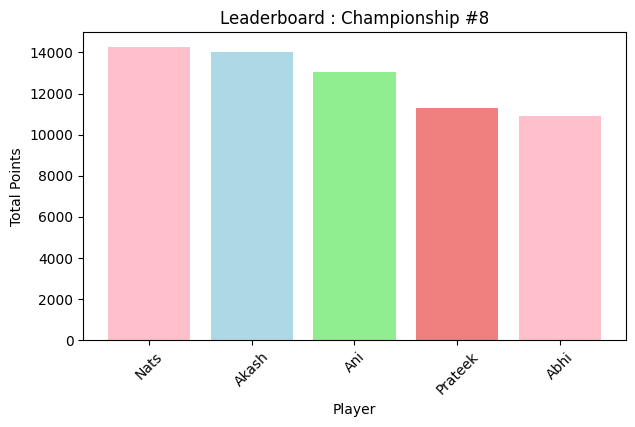

In [19]:
tournament.getLeaderboardBarplot(save_image=SAVE_IMAGES)

# Part 2 - Seeing performance graph over the tournament

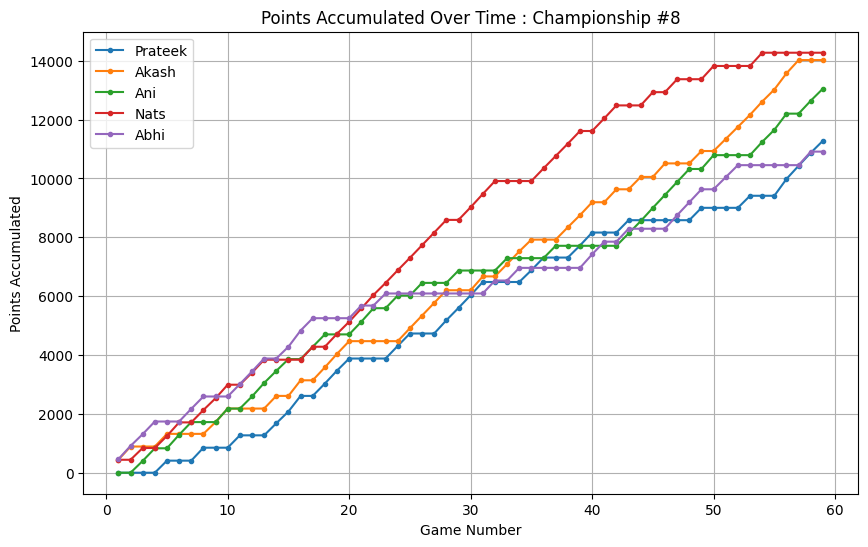

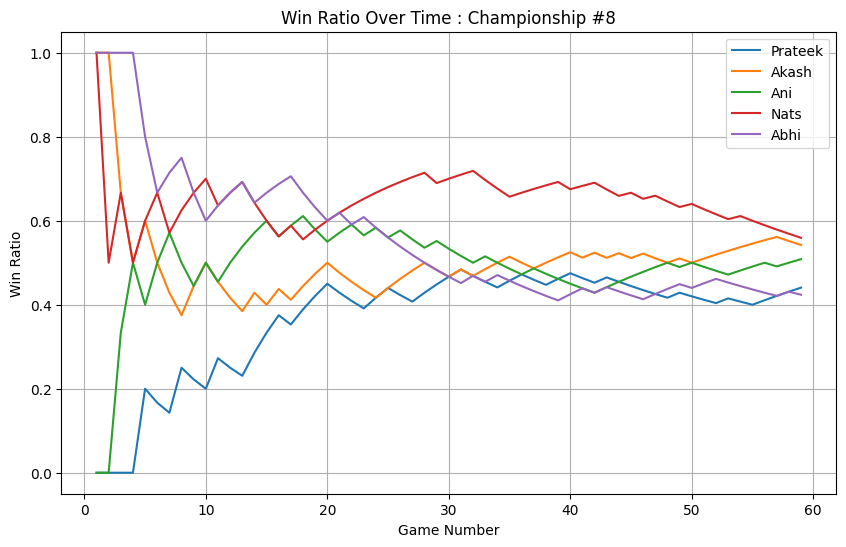

In [20]:
tournament.getTimeseriesPlot(save_image=SAVE_IMAGES)
tournament.getWinRatioSeriesPlot(save_image=SAVE_IMAGES)

# Part 3 - Pair-wise stats

In [21]:
tournament.pairwiseStats

,Player_x,Player_y,Wins,Losses,TotalGames,AvgPoints,WinPercentage
5,Akash,Nats,15,9,24,268.3,62.5
4,Akash,Ani,10,7,17,259.4,58.8
7,Ani,Nats,15,11,26,251.9,57.7
9,Nats,Prateek,11,11,22,212.7,50.0
6,Akash,Prateek,16,17,33,212.1,48.5
2,Abhi,Nats,11,12,23,203.5,47.8
0,Abhi,Akash,8,10,18,196.1,44.4
1,Abhi,Ani,12,16,28,182.1,42.9
8,Ani,Prateek,9,12,21,185.7,42.9
3,Abhi,Prateek,8,16,24,145.4,33.3


# Part 4 - Trio stats

In [22]:
tournament.trioStats

,Player_x,Player_y,Player_z,Wins,Losses,TotalGames,AvgPoints,WinPercentage
8,Akash,Nats,Prateek,7,3,10,297.0,70.0
3,Abhi,Ani,Nats,6,3,9,282.2,66.7
7,Akash,Ani,Prateek,3,3,6,230.0,50.0
4,Abhi,Ani,Prateek,3,4,7,180.0,42.9
2,Abhi,Akash,Prateek,3,5,8,173.8,37.5
5,Abhi,Nats,Prateek,1,4,5,84.0,20.0
9,Ani,Nats,Prateek,1,4,5,86.0,20.0


# Part 5 - #games bid and won

In [23]:
tournament.bidAndWonStats

,Player,Bid and Won
1,Akash,8
4,Abhi,8
0,Prateek,3
3,Nats,3
2,Ani,2


# Part 6 - Overall Player Rankings

In [24]:
universal_rating_system = UniversalRatingSystem()

load_tournaments_from_history(universal_rating_system)

universal_rating_system.showRankingChange(tournament)

Going back in time!


  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 14.95it/s]


Championship #8


Rank,Change,Player,Rating,#Games,Win %,Bid+Win%
1,-,Akash,1158 (+2),541,59,12
2,-,Prateek,1049 (-18),541,53,9
3,-,Ani,1004 (+6),265,49,3
4,▲ 1,Nats,1002 (+16),474,48,10
5,▼ 1,Naati,996 (0),289,49,8
6,-,Abhi,929 (-12),466,43,7



 -----------------------------


In [25]:
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills ' +
          'for<br>the subject', 'The course developed ' +
          'my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,a
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

In [28]:
game_data = tournament.gameData
game_data

,Game ID,Prateek,Akash,Ani,Nats,Abhi,CumSum_Prateek,MovingAvgPoints_Prateek,Prateek_Won,NumGamesWon_Prateek,...,CumSum_Nats,MovingAvgPoints_Nats,Nats_Won,NumGamesWon_Nats,WinRatio_Nats,CumSum_Abhi,MovingAvgPoints_Abhi,Abhi_Won,NumGamesWon_Abhi,WinRatio_Abhi
0,1,0,440,0,440,460,0,0.000000,0,0,...,440,440.000000,1,1,1.000000,460,460.000000,1,1,1.000000
1,2,0,450,0,0,450,0,0.000000,0,0,...,440,220.000000,0,1,0.500000,910,455.000000,1,2,1.000000
2,3,0,0,400,400,400,0,0.000000,0,0,...,840,280.000000,1,2,0.666667,1310,436.666667,1,3,1.000000
3,4,0,0,430,0,430,0,0.000000,0,0,...,840,210.000000,0,2,0.500000,1740,435.000000,1,4,1.000000
4,5,410,430,0,410,0,410,82.000000,1,1,...,1250,250.000000,1,3,0.600000,1740,348.000000,0,4,0.800000
5,6,0,0,460,460,0,410,68.333333,0,1,...,1710,285.000000,1,4,0.666667,1740,290.000000,0,4,0.666667
6,7,0,0,430,0,430,410,58.571429,0,1,...,1710,244.285714,0,4,0.571429,2170,310.000000,1,5,0.714286
7,8,440,0,0,420,420,850,106.250000,1,2,...,2130,266.250000,1,5,0.625000,2590,323.750000,1,6,0.750000
8,9,0,400,0,400,0,850,94.444444,0,2,...,2530,281.111111,1,6,0.666667,2590,287.777778,0,6,0.666667
9,10,0,460,460,460,0,850,85.000000,0,2,...,2990,299.000000,1,7,0.700000,2590,259.000000,0,6,0.600000


/tmp/ipykernel_6578/2198901226.py:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



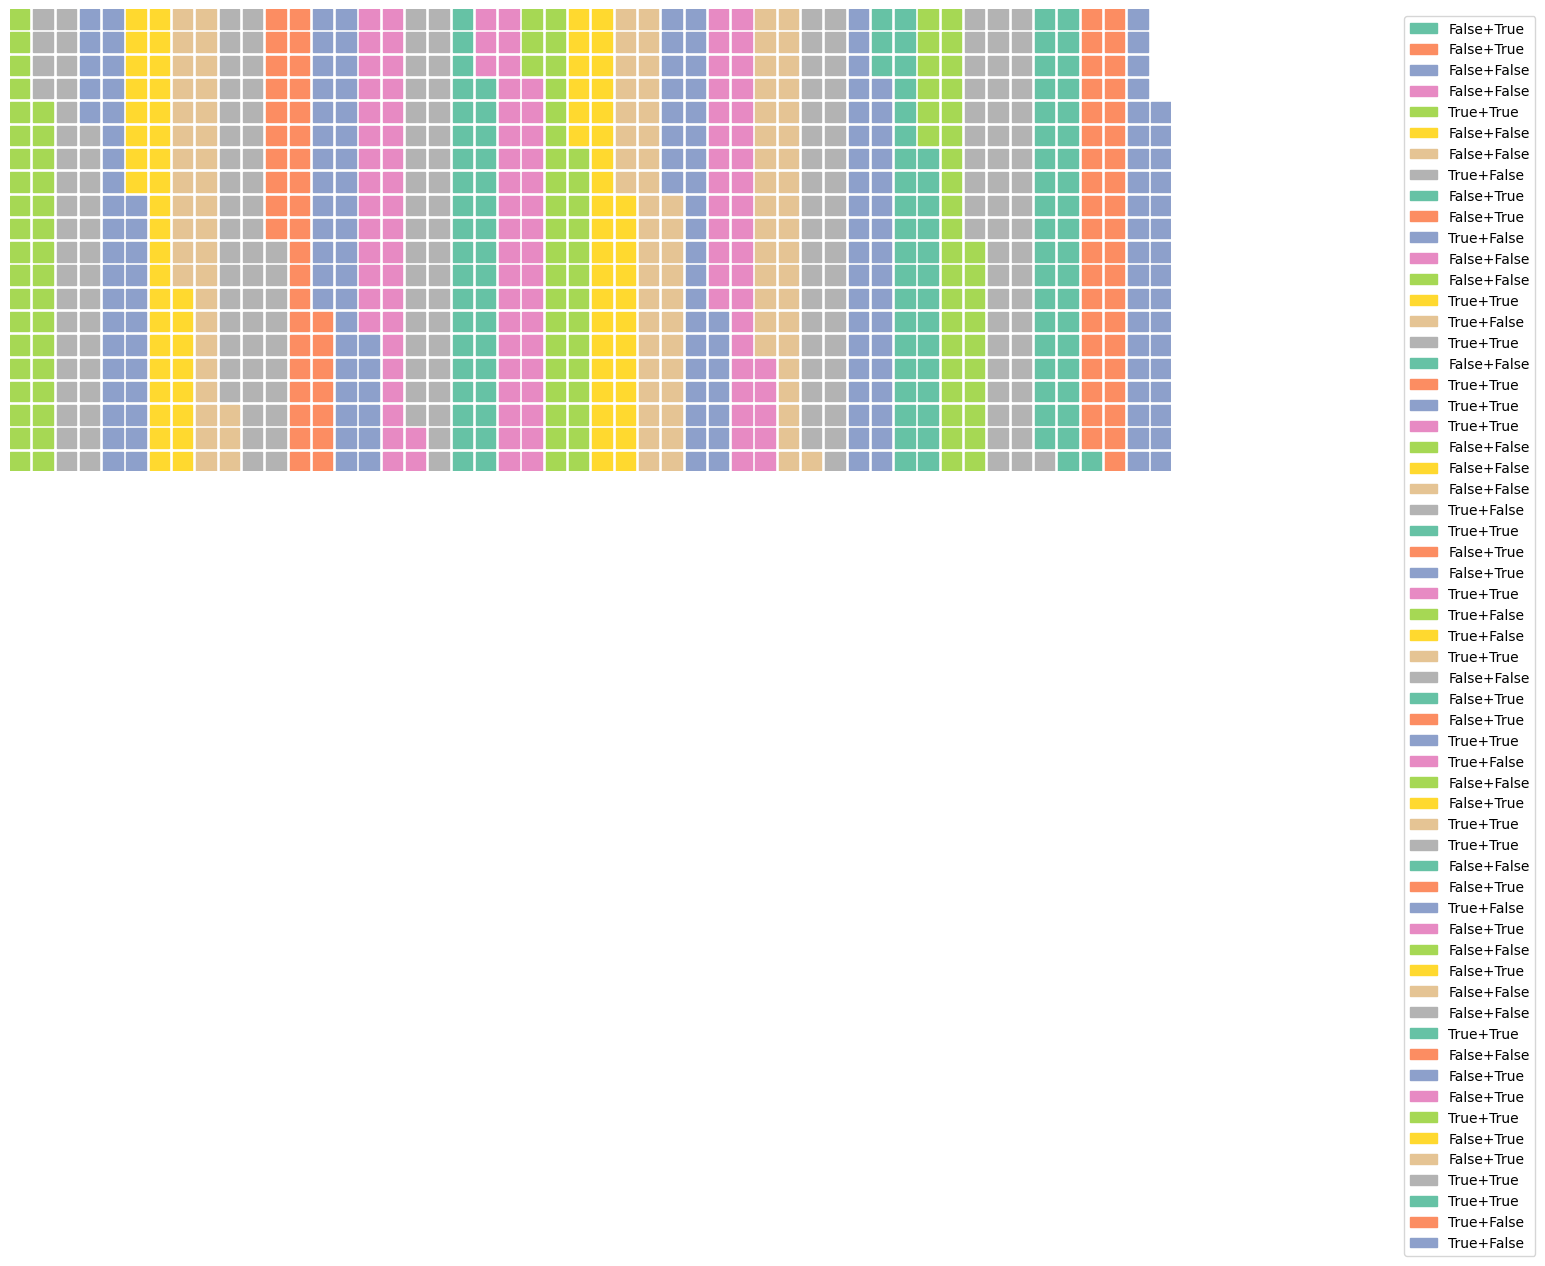

In [30]:
#!pip install pywaffle
from matplotlib import pyplot as plt
from pywaffle import Waffle


fig = plt.figure(FigureClass=Waffle, 
                 rows=20, columns=50,
                 values=game_data.Prateek, 
                #  colors=pal_,
                 labels=[f'{i>0}+{j>0}' for i,j in zip(game_data.Prateek, game_data.Akash)],
                 figsize = (15,6),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.32, 1),
                        })
plt.tight_layout()
plt.show()

59
{10: 28, 1: 30, 0: 27, 11: 13}
{10: 17, 1: 18, 0: 16, 11: 8}


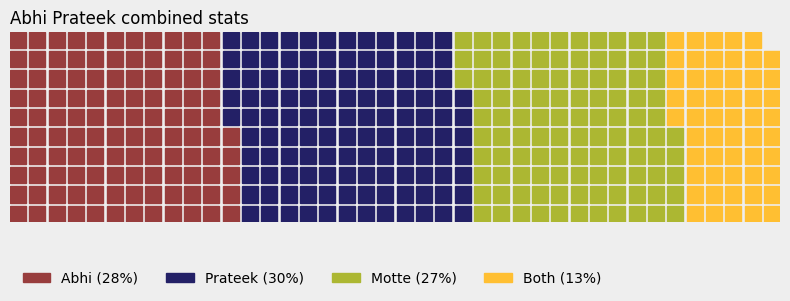

In [76]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

player_1 = 'Abhi'
player_2 = 'Prateek'

df1 = game_data[player_1]
df2 = game_data[player_2]

counter = {}
for a,b in zip(df1, df2):
    key = 10*int(bool(a)) + int(bool(b))
    if key not in counter:
        counter[key] = 0
    counter[key] += 1

total = game_data.shape[0]
print(total)
perc = {}
for k, v in counter.items():
    perc[k] = int(100.0*v/total)

mapping = {
    0: 'Motte',
    1: player_2,
    10: player_1,
    11: 'Both'
}

print(perc)
print(counter)
data = counter
# data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    # rows=5, 
    rows=10, columns=40,
    values=data, 
    colors=("#983D3D", "#232066", "#ACB732", "#FFBF32"),
    title={'label': f'{player_1} {player_2} combined stats', 'loc': 'left'},
    labels=["{0} ({1}%)".format(mapping[k], v) for k, v in perc.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(8, 5)
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

player_1 = 'Prateek'
player_2 = 'Akash'


{10: 16, 0: 17, 11: 16, 1: 10}


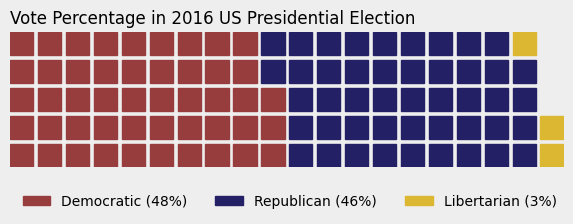

In [47]:

df1 = game_data[player_1]
df2 = game_data[player_2]

counter = {}
for a,b in zip(df1, df2):
    key = int(bool(a)) + 10*int(bool(b))
    if key not in counter:
        counter[key] = 0
    counter[key] += 1

print(counter)
data = counter
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Vote Percentage in 2016 US Presidential Election', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

In [ ]:
for player_1 in tournament.players:
    
    for player_2 in tournament.players:
        print(player_2)

In [ ]:
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills ' +
          'for<br>the subject', 'The course developed ' +
          'my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,a
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

### Fin!